In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
response = requests.get('https://api.covid19india.org/states_daily.json')
df = None

Your output dataframe should look like this:
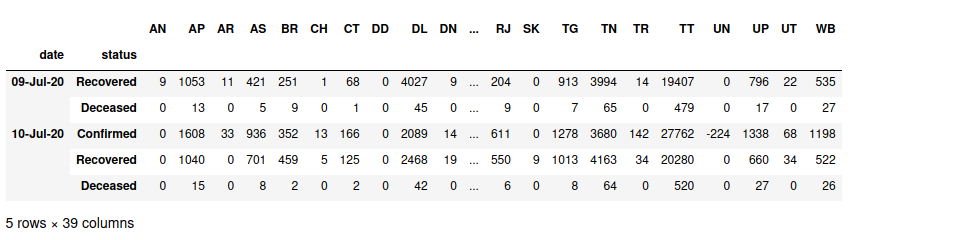

In [ ]:
# YOUR CODE GOES HERE
df

In [ ]:
# PLOT A CHART SHOWING DAILY INCREASE IN CONFIRMED CASES
fig = plt.figure()